In [ ]:
pip install pycaret

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat data
df = pd.read_csv('no2_surabaya.csv')
# 2. Konversi kolom 't' menjadi datetime
df['t'] = pd.to_datetime(df['t'])
# Aggregasi data 
# Karena ada tanggal ganda, kita ambil rata-rata (mean) NO2 per hari
df = df.groupby('t')['NO2'].mean().to_frame()
# Mengatur Frekuensi Harian
df = df.asfreq('D')
# scaling data
df['NO2'] = df['NO2'] * 1000000 

# Memeriksa data 
print("Info Data:")
print(df.info())
print("\n5 Data Teratas:")
print(df.head())


Info Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1081 entries, 2022-10-21 to 2025-10-05
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NO2     776 non-null    float64
dtypes: float64(1)
memory usage: 16.9 KB
None

5 Data Teratas:
                  NO2
t                    
2022-10-21        NaN
2022-10-22  87.540855
2022-10-23  70.853889
2022-10-24        NaN
2022-10-25  50.313709



Jumlah Data Hilang: 305
Persentase Data Hilang: 28.21%


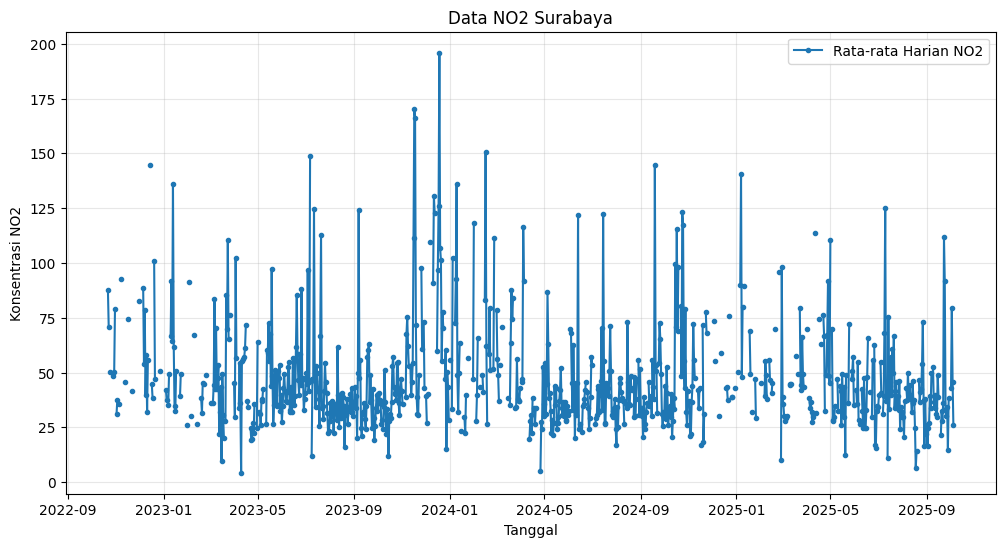

In [3]:
# Menghitung jumlah missing value
missing_count = df['NO2'].isnull().sum()
total_rows = len(df)
percentage = (missing_count / total_rows) * 100

print(f"\nJumlah Data Hilang: {missing_count}")
print(f"Persentase Data Hilang: {percentage:.2f}%")

# Visualisasi Data Mentah (dengan gap/putus-putus)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['NO2'], label='Rata-rata Harian NO2', marker='.')
plt.title('Data NO2 Surabaya')
plt.ylabel('Konsentrasi NO2')
plt.xlabel('Tanggal')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [4]:
from pycaret.time_series import *
s = setup(df, target='NO2', fh=30, session_id=123, numeric_imputation_target='linear')



,Description,Value
0,session_id,123
1,Target,NO2
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1081, 1)"
5,Transformed data shape,"(1081, 1)"
6,Transformed train set shape,"(1051, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,28.2%
9,Fold Generator,ExpandingWindowSplitter


In [5]:
# Membuat model Exponential Smoothing (ETS)
ets_model = create_model('ets')
# Menampilkan parameter model yang ditemukan otomatis
print(ets_model)


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2025-06-07,0.6486,0.5577,11.2410,14.6796,0.2862,0.2966,-0.2780
1,2025-07-07,0.7753,0.8439,13.3935,22.0509,0.3101,0.3017,-0.1387
2,2025-08-06,0.5598,0.5112,9.7095,13.4237,0.4832,0.2988,-0.0592
Mean,NaT,0.6612,0.6376,11.4480,16.7181,0.3599,0.2990,-0.1586
SD,NaT,0.0884,0.1471,1.5111,3.8056,0.0877,0.0021,0.0904


AutoETS(seasonal='mul', sp=2, trend='add')


In [6]:
# Melakukan prediksi (Forecast)
prediction = predict_model(ets_model)
print(prediction)

# Visualisasi Grafik Peramalan
plot_model(ets_model, plot='forecast')

# Visualisasi Komponen (Level, Trend, Musiman)
plot_model(ets_model, plot='decomp')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ETS,0.7792,0.8672,13.3840,22.5705,0.2666,0.3043,-0.2911


             y_pred
2025-09-06  31.5582
2025-09-07  31.7335
2025-09-08  31.4799
2025-09-09  31.6546
2025-09-10  31.4016
2025-09-11  31.5758
2025-09-12  31.3233
2025-09-13  31.4970
2025-09-14  31.2450
2025-09-15  31.4182
2025-09-16  31.1667
2025-09-17  31.3393
2025-09-18  31.0884
2025-09-19  31.2605
2025-09-20  31.0101
2025-09-21  31.1817
2025-09-22  30.9318
2025-09-23  31.1028
2025-09-24  30.8535
2025-09-25  31.0240
2025-09-26  30.7752
2025-09-27  30.9452
2025-09-28  30.6969
2025-09-29  30.8664
2025-09-30  30.6186
2025-10-01  30.7875
2025-10-02  30.5404
2025-10-03  30.7087
2025-10-04  30.4621
2025-10-05  30.6299
